# OpenAQ Air Quality Analysis
## Introduction
<text>

## Prerequisite Packages Installation

In [3]:
! pip install requests
! pip install pandas
! pip install matplotlib
! pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 1.4 MB/s eta 0:00:00a 0:00:01


## Module Importation

In [46]:
import requests
import pandas as pd
from time import sleep
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from random import choice

## Data Retrieval
The `read_csv()` function is used to obtain data from the ./data/ folder. Moreover, unnecessary columns are dropped to facilitate ease of interpretation.

In [7]:
df_lublin = pd.read_csv("./data/Lublin_20_February_2024_to_20_March_2024.csv")
df_malkia = pd.read_csv("./data/Malkia_Nakuru_20_February_2024_to_20_March_2024.csv")
df_nyayo = pd.read_csv("./data/Nyayo_Embakasi_Nairobi_20_February_2024_to_20_March_2024.csv")
df_ogada = pd.read_csv("./data/Ogada_Obubra_20_February_2024_to_20_March_2024.csv")

df_lublin.drop(['latitude', 'longitude', 'country_iso', 'isMobile', 'isMonitor', 'owner_name', 'provider', 'datetimeLocal'], axis=1, inplace=True)
df_malkia.drop(['latitude', 'longitude', 'country_iso', 'isMobile', 'isMonitor', 'owner_name', 'provider', 'datetimeLocal'], axis=1, inplace=True)
df_nyayo.drop(['latitude', 'longitude', 'country_iso', 'isMobile', 'isMonitor', 'owner_name', 'provider', 'datetimeLocal'], axis=1, inplace=True)
df_ogada.drop(['latitude', 'longitude', 'country_iso', 'isMobile', 'isMonitor', 'owner_name', 'provider', 'datetimeLocal'], axis=1, inplace=True)

In [6]:
df_lublin.head(5)

,location_id,location_name,parameter,value,unit,datetimeUtc,timezone
0,10528,"Lublin, ul. Obywatelska",co,210.0,µg/m³,2024-02-20T01:00:00+00:00,Europe/Warsaw
1,10528,"Lublin, ul. Obywatelska",co,190.0,µg/m³,2024-02-20T02:00:00+00:00,Europe/Warsaw
2,10528,"Lublin, ul. Obywatelska",co,180.0,µg/m³,2024-02-20T03:00:00+00:00,Europe/Warsaw
3,10528,"Lublin, ul. Obywatelska",co,190.0,µg/m³,2024-02-20T04:00:00+00:00,Europe/Warsaw
4,10528,"Lublin, ul. Obywatelska",co,190.0,µg/m³,2024-02-20T05:00:00+00:00,Europe/Warsaw


In [7]:
df_malkia.head(5)

,location_id,location_name,parameter,value,unit,datetimeUtc,timezone
0,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",pm25,10.0,µg/m³,2024-02-20T01:00:00+00:00,Africa/Nairobi
1,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",pm25,22.0,µg/m³,2024-02-20T02:00:00+00:00,Africa/Nairobi
2,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",pm25,21.0,µg/m³,2024-02-20T03:00:00+00:00,Africa/Nairobi
3,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",pm25,29.0,µg/m³,2024-02-20T04:00:00+00:00,Africa/Nairobi
4,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",pm25,31.0,µg/m³,2024-02-20T05:00:00+00:00,Africa/Nairobi


In [8]:
df_nyayo.head(5)

,location_id,location_name,parameter,value,unit,datetimeUtc,timezone
0,2388059,"Nyayo Embakasi, Nairobi",pm1,12.0,µg/m³,2024-03-06T17:00:00+00:00,Africa/Nairobi
1,2388059,"Nyayo Embakasi, Nairobi",pm1,13.0,µg/m³,2024-03-06T18:00:00+00:00,Africa/Nairobi
2,2388059,"Nyayo Embakasi, Nairobi",pm1,11.0,µg/m³,2024-03-06T19:00:00+00:00,Africa/Nairobi
3,2388059,"Nyayo Embakasi, Nairobi",pm1,10.0,µg/m³,2024-03-06T20:00:00+00:00,Africa/Nairobi
4,2388059,"Nyayo Embakasi, Nairobi",pm1,9.4,µg/m³,2024-03-06T21:00:00+00:00,Africa/Nairobi


In [10]:
df_ogada.head(5)

,location_id,location_name,parameter,value,unit,datetimeUtc,timezone
0,1894636,"Ogada, Obubra Local Government Area (LGA) → A3...",temperature,28.0,f,2024-03-09T20:00:00+00:00,Africa/Lagos
1,1894636,"Ogada, Obubra Local Government Area (LGA) → A3...",temperature,27.0,f,2024-03-09T21:00:00+00:00,Africa/Lagos
2,1894636,"Ogada, Obubra Local Government Area (LGA) → A3...",temperature,26.0,f,2024-03-09T22:00:00+00:00,Africa/Lagos
3,1894636,"Ogada, Obubra Local Government Area (LGA) → A3...",temperature,25.0,f,2024-03-09T23:00:00+00:00,Africa/Lagos
4,1894636,"Ogada, Obubra Local Government Area (LGA) → A3...",temperature,25.0,f,2024-03-10T00:00:00+00:00,Africa/Lagos


## Data Cleaning

### Duplicate Dropper Function
A generic function that checks if a dataframe has duplicates. If it has duplicates it drops them.

In [8]:
def duplicate_dropper(df):
    """
    Checks and drops duplicates in a data frame

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
    """
    duplicates = df.duplicated()
    for i in duplicates:
        if i == True:
            df.drop_duplicates(inplace=True)
            break
    

### DateTime Converter Function
A generic function that converts the values in the datetimeUtc column into datetime format.

In [11]:
def datetime_converter(df):
    """
    Converts column with dates and time into datetime format

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
    """
    df['datetimeUtc'] = pd.to_datetime(df['datetimeUtc'])

### Dropping Duplicates
Using the generic function all duplicates will be dropped in each of the DataFrames.

In [12]:
duplicate_dropper(df_lublin)
duplicate_dropper(df_malkia)
duplicate_dropper(df_nyayo)
duplicate_dropper(df_ogada)

### Converting to DateTime format
Using the generic function to convert the column with dates and times into datetime format

In [13]:
datetime_converter(df_lublin)
datetime_converter(df_malkia)
datetime_converter(df_nyayo)
datetime_converter(df_ogada)

## Data Exploration

### Plotting Box Plot Function
A generic function that displays a box plot with disaggregation by a categorical variable

In [14]:
def plot_boxplot(df, x, y, legend=None):
  """
  Plots a box plot of the specified data, optionally displaying actual parameter names on the x-axis.

  Args:
      df (pandas.DataFrame): The DataFrame containing the data.
      x (str): The column name for the x-axis (grouping variable).
      y (str): The column name for the quantitative variable to plot.
      legend (str, optional): The column name containing parameter names (for labeling). Defaults to None.
  """

  plt.figure(figsize=(8, 6))

  plt.boxplot(
      [df[df[x] == group][y] for group in df[x].unique()]
  )
  
  if legend is not None:
      x_labels = df[legend].unique()
      x_labels = [label.upper() for label in x_labels]
      plt.xticks(range(1, len(x_labels) + 1), x_labels)
  else:
      plt.xlabel(x.capitalize())

  plt.ylabel(y.capitalize())
  plt.title(f'Box Plot of {y.capitalize()} by {x.capitalize()}')
  plt.tight_layout()
  plt.show()

In [16]:
x = 'parameter'
y = 'value'
legend = 'parameter'

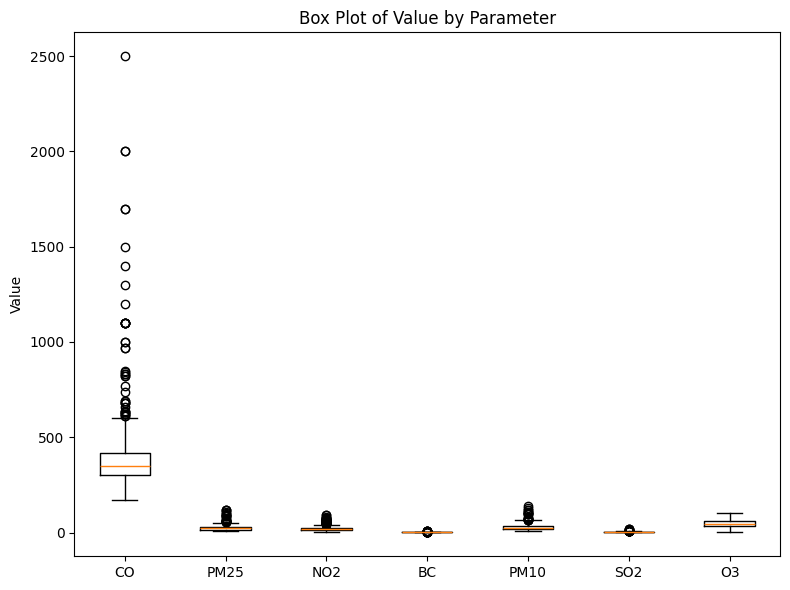

In [16]:
plot_boxplot(df_lublin, x, y, legend)

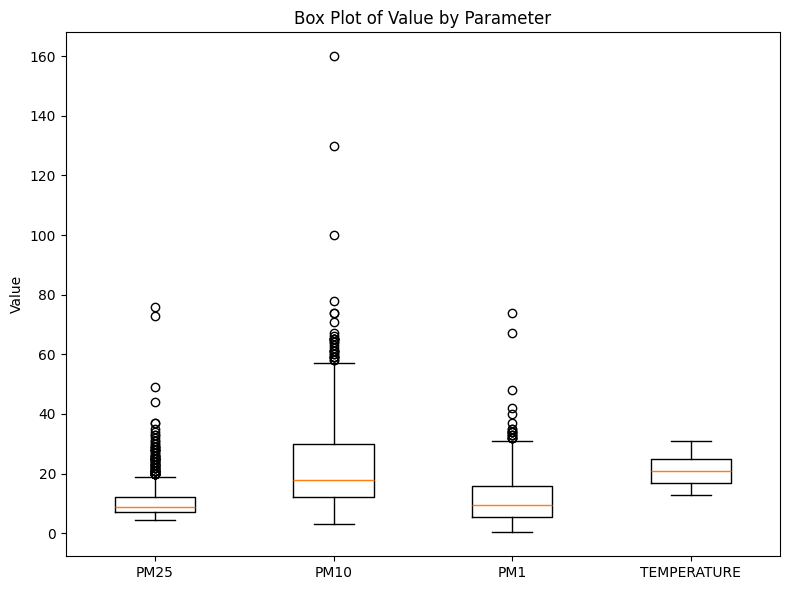

In [17]:
plot_boxplot(df_malkia, x, y, legend)

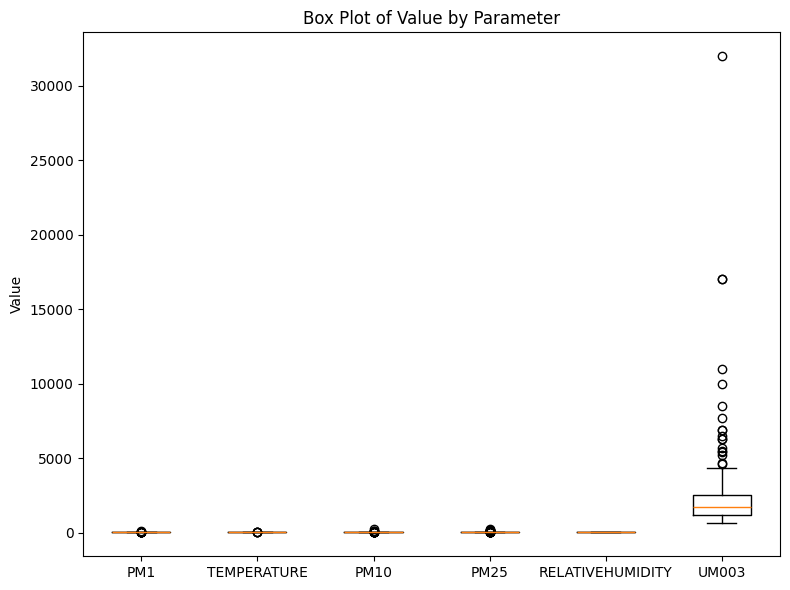

In [18]:
plot_boxplot(df_nyayo, x, y, legend)

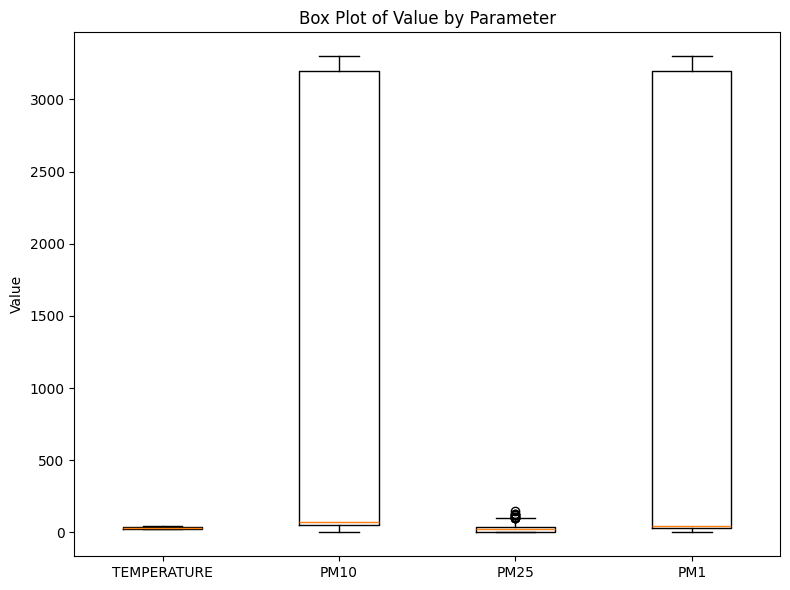

In [17]:
plot_boxplot(df_ogada, x, y, legend)

## Data Visualisation

### Plotting Line Graph Function
A generic function that draws a line graph with disaggregation by a categorical variable.

In [18]:
# Redundant Function. To be removed

def plot_line_graph(df, x_axis, y_axis, legend=None):
    """
    Plots a line graph of every value disaggregated by the 'parameter' column.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        x (str): The column name for the x-axis (grouping variable).
        y (str): The column name for the quantitative variable to plot.
        legend (str, optional): The column name containing parameter names (for labeling). Defaults to None.
    """

    plt.figure(figsize=(10, 6))
    for parameter in df[legend].unique():
        df_filtered = df[df[legend] == parameter]
        plt.plot(df_filtered[x_axis], df_filtered[y_axis], label=parameter)

    plt.xlabel(x_axis.capitalize())
    plt.ylabel(y_axis.capitalize())
    plt.title(f'Line Graph Disaggregated by {legend.capitalize()}')
    if legend:
        plt.legend()
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [55]:
# Misati
x_axis = 'datetimeUtc'
y_axis = 'value'
legend = 'parameter'

colors = ["#626473", "#737162", "#556FF2", "#736C62", "#F2B955", "#3B754B", "#753B5F", "#0E0CF5", "#416275"]

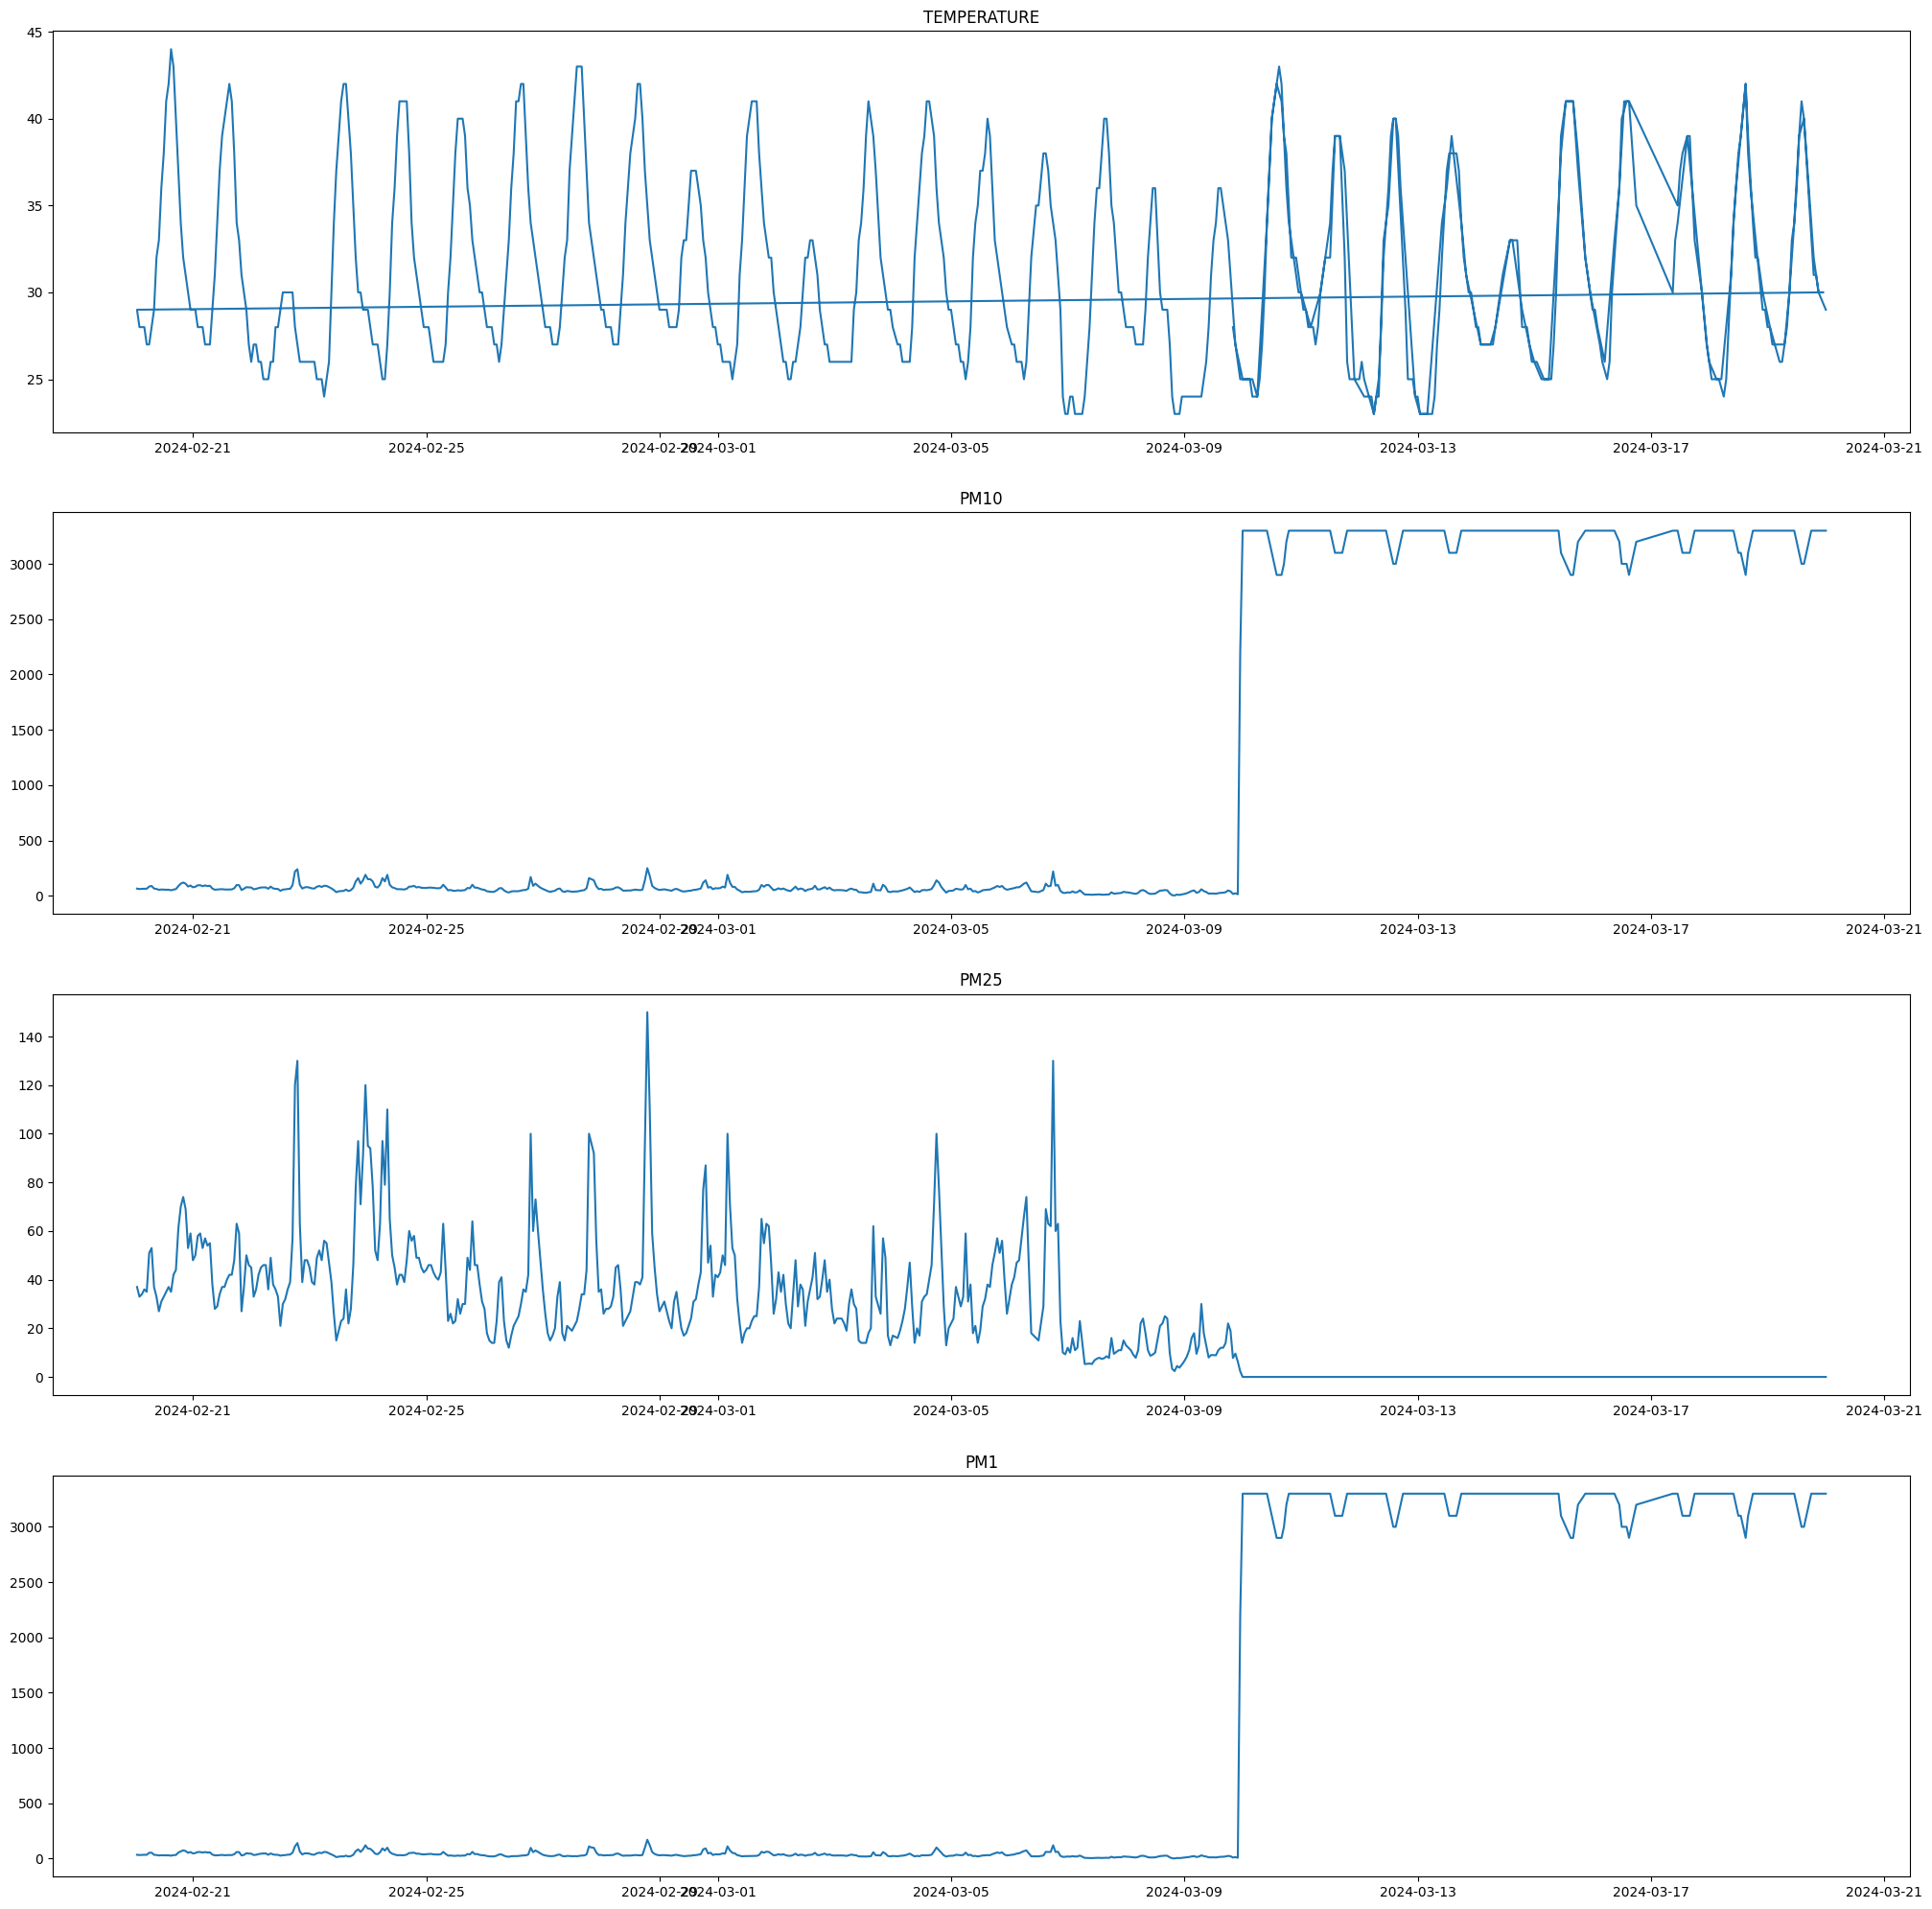

In [39]:
fig, axs = plt.subplots(nrows=len(data), ncols=1, figsize=(25, 25))
i = 0
for key, val in data.items():
    axs[i].set_title(key.upper())
    axs[i].plot([xy[0] for xy in val],[xy[1] for xy in val])
    i += 1
plt.show()

#### Lublin Air Quality Line Graph

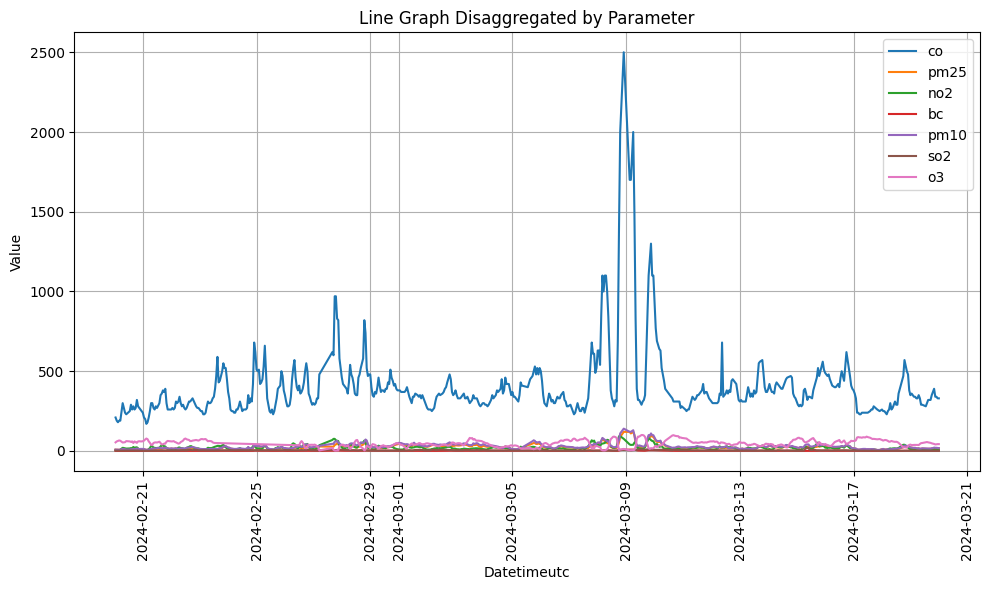

In [24]:
plot_line_graph(df_lublin, x_axis, y_axis, legend)


The amount of carbon (I) oxide in the atmosphere at Lublin in Poland peaked from March 8th at 5 PM to March 9th at 8 AM. This aligns with the Hindu festival of Mahashivratri Maha Shivratri which is celebrated on 8th and 9th of March. The amount peaks again to a lesser degree from March 9th at 7 PM to March 10th at 1 AM. During this time, the devotees fast and light sacred fires. Combustion at times when incomplete releases carbon (I) oxide into the atmosphere. As a result, this event affected the amount of CO in the environment. Hence, in Lublin there is a notable Hindu population.

Notwithstanding, soon after the event ended the values of CO stabilised showing that the high CO levels were a seasonal rather than perennial matter. On the other hand, the other indicators of air pollution stay low and consistent. This indicates that Lublin has a solid system that keeps its air clean and pure.

#### Malkia Air Quality Line Graph

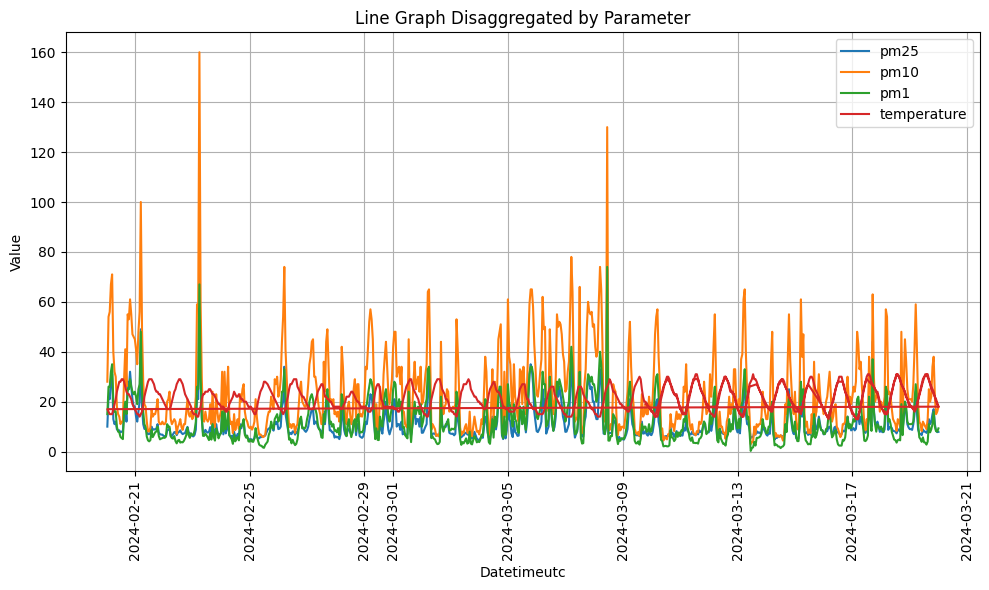

In [25]:
plot_line_graph(df_malkia, x_axis, y_axis, legend)

#### Nyayo Air Quality Line Graph

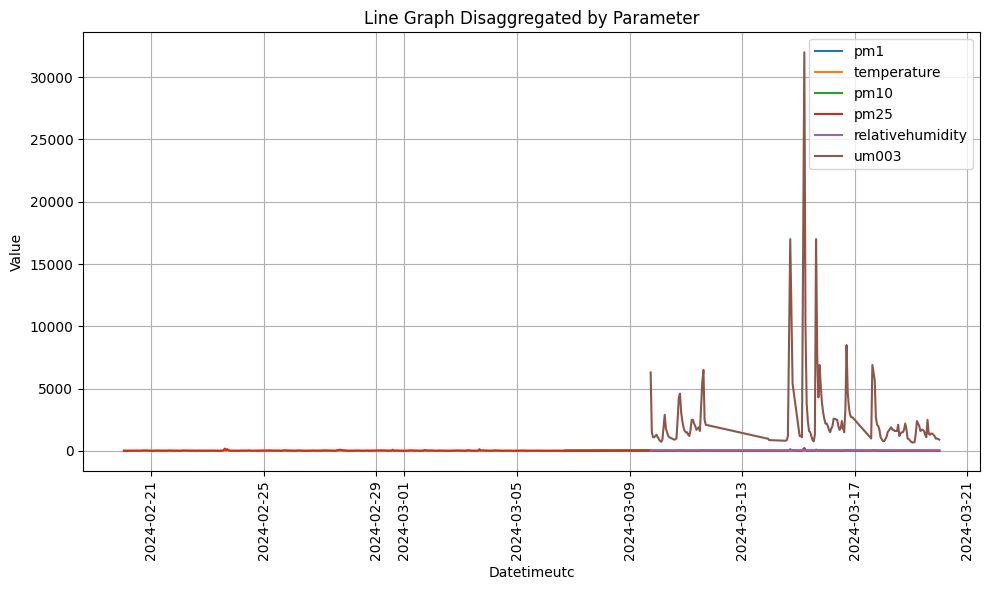

In [26]:
plot_line_graph(df_nyayo, x_axis, y_axis, legend)

#### Ogada Air Quality Line Graphs - (Misati)

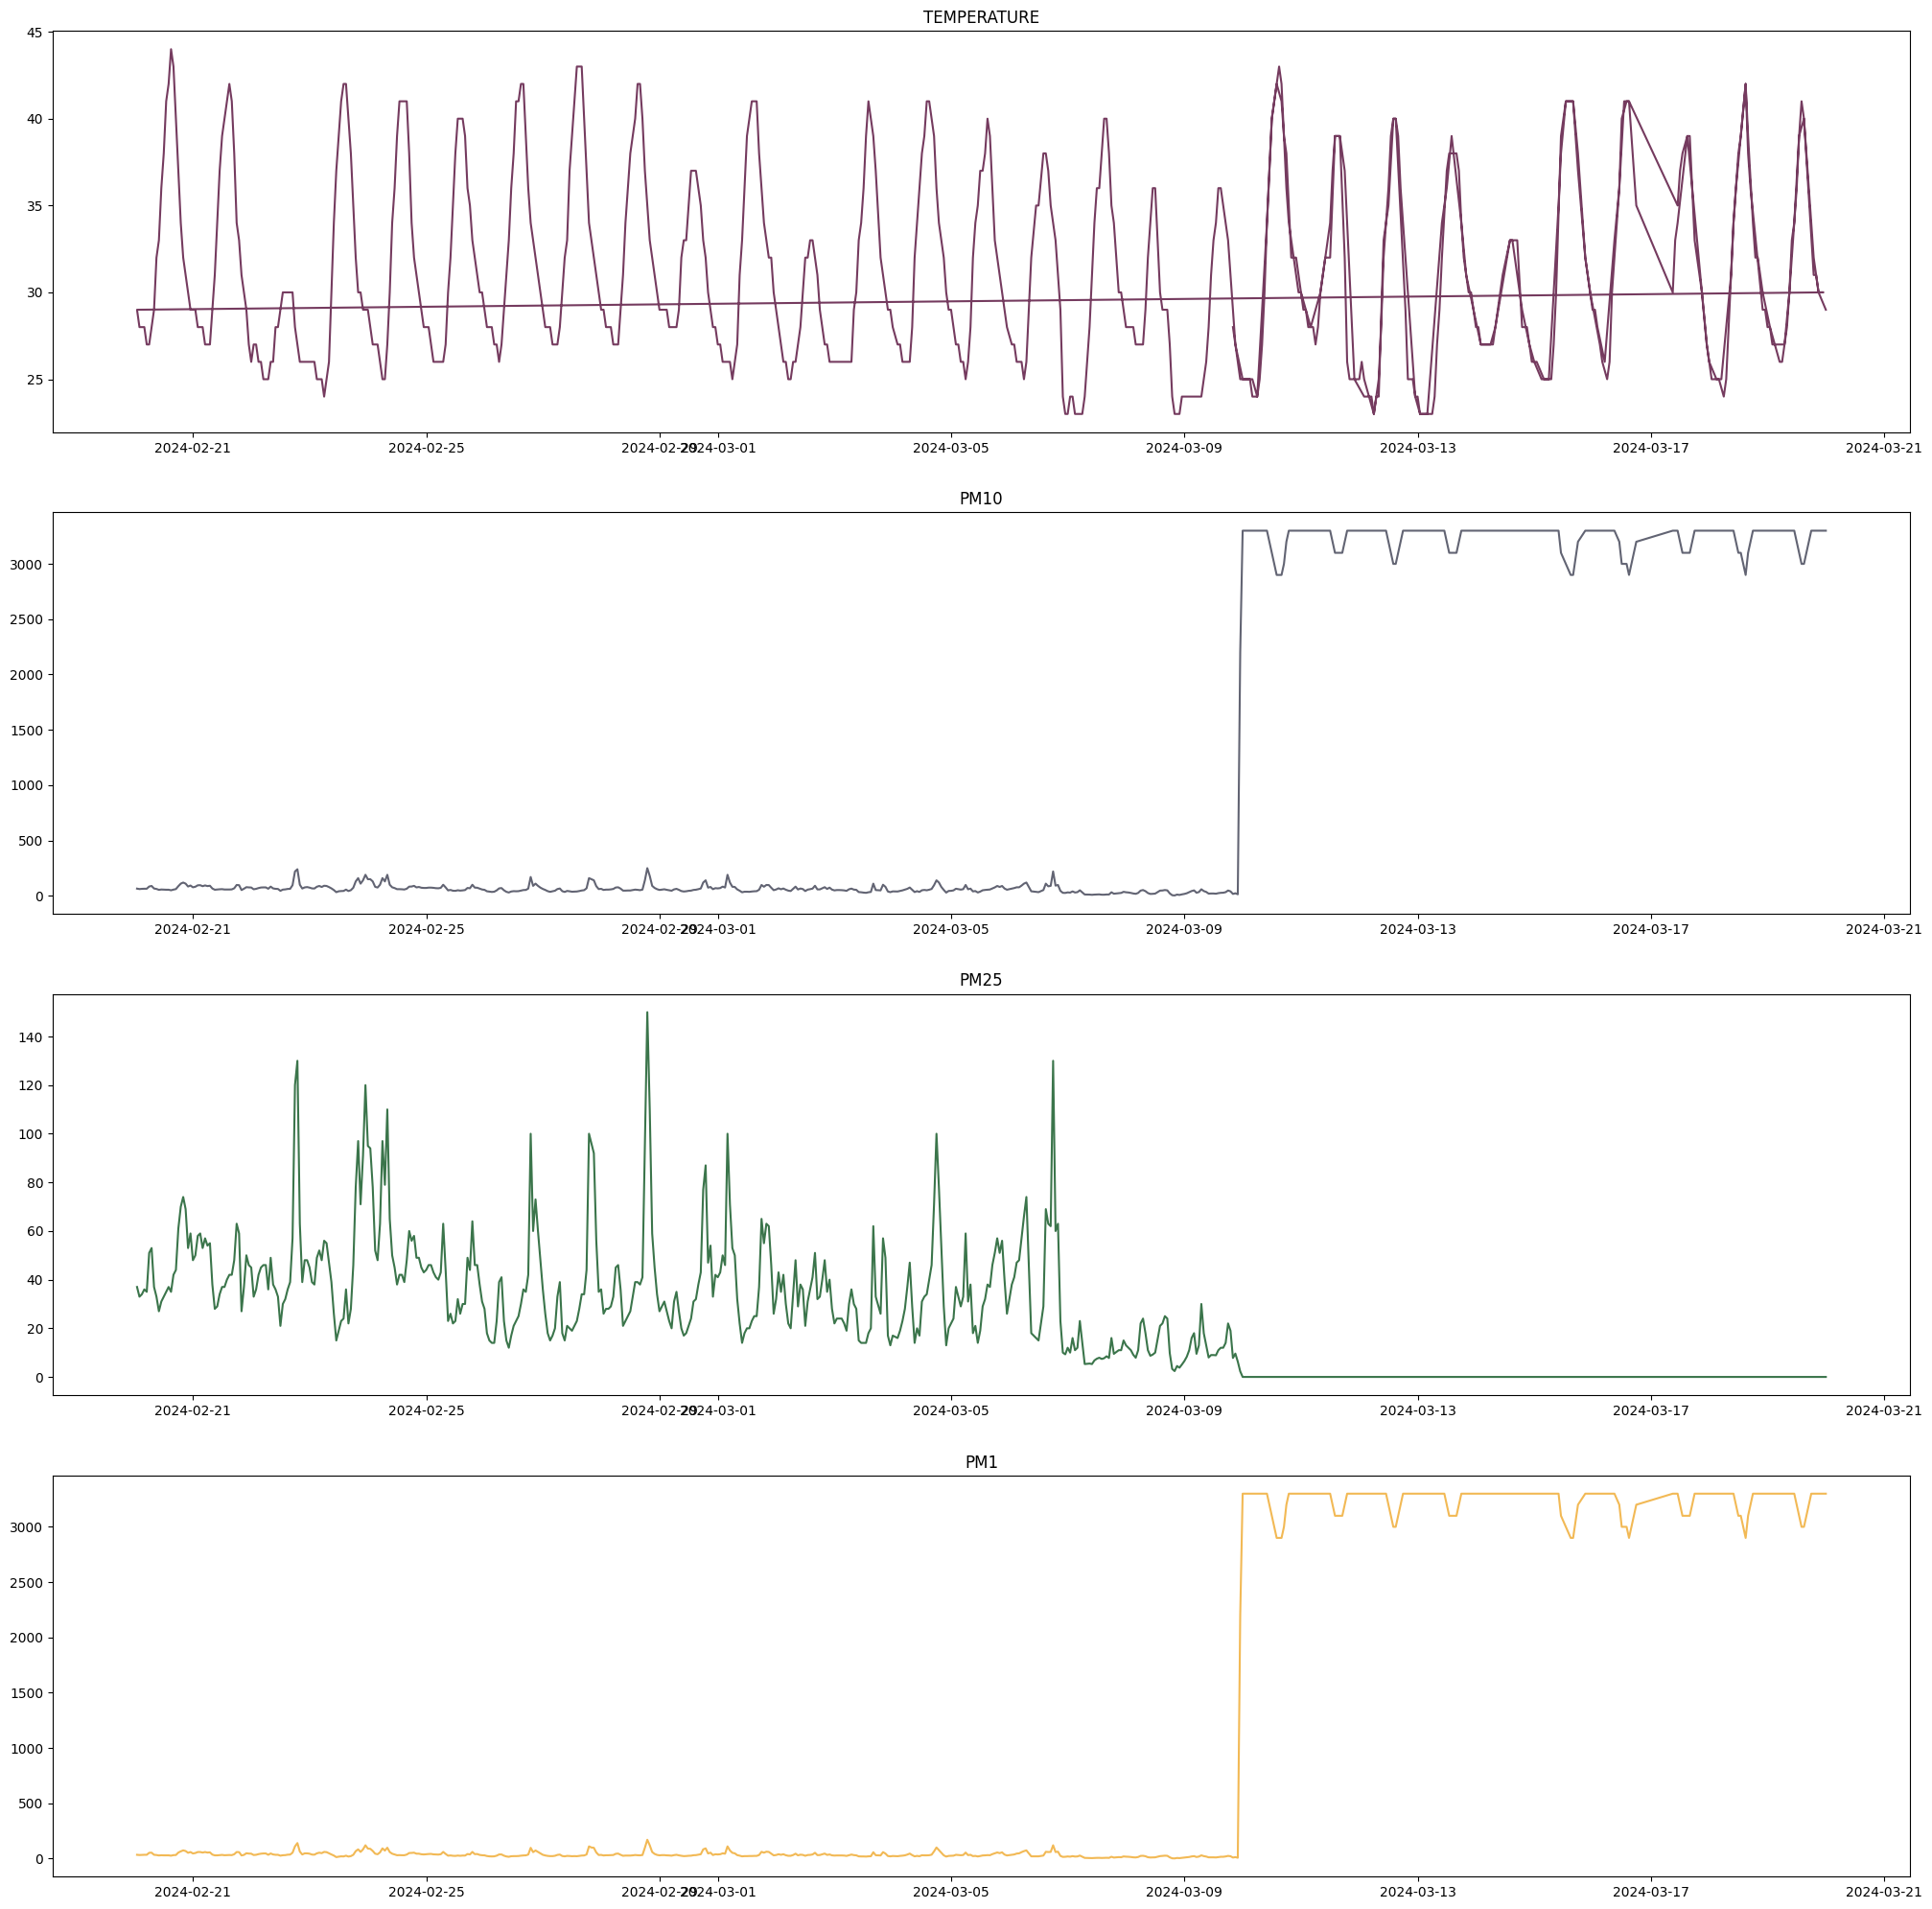

In [54]:
data = {}
for param, col_x, col_y in zip(df_ogada[legend], df_ogada[x_axis], df_ogada[y_axis]):
    if not param in data:
        data[param] = []
    data[param].append((col_x, col_y))

fig, axs = plt.subplots(nrows=len(data), ncols=1, figsize=(25, 25))
i = 0
for key, val in data.items():
    axs[i].set_title(key.upper())
    axs[i].plot([xy[0] for xy in val],[xy[1] for xy in val], color=choice(colors))
    i += 1

plt.show()